# Regional Electricity Demand

{badge}`R,badge-primary` {badge}`forecasting,badge-secondary` {badge}`energy market,badge-warning` 

This post explores time series forecasting models for the 5-min regional electricity demand data from the Electricity Market of the Philippines.

## Setup

### Libraries

In [36]:
library(data.table)
library(forecast)
library(ggplot2)

### Paths

In [37]:
filename = "/Volumes/data/projects/django-mms/data/demand_daily/luzon-hourly-demand.csv"

In [38]:
dt = fread(filename,sep=",")

In [39]:
head(dt)

TIME_INTERVAL,MKT_REQT,LOAD_BID,LOAD_CURTAILED,LOSSES,GENERATION,MKT_IMPORT,MKT_EXPORT
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-06-26 00:00:00,7763.500,320.0000,0,138.0200,8147.067,74.45909,0
2021-06-26 01:00:00,7887.279,466.6667,0,147.4142,8401.715,99.62167,0
2021-06-26 02:00:00,7527.432,480.0000,0,139.3717,7996.198,150.60667,0
2021-06-26 03:00:00,7326.856,480.0000,0,131.8258,7722.851,215.86000,0
2021-06-26 04:00:00,7104.273,480.0000,0,121.6275,7492.467,213.44250,0
2021-06-26 05:00:00,6941.924,480.0000,0,115.4933,7348.954,188.46833,0


In [40]:
n_date <- unique(dt[, TIME_INTERVAL])
length(n_date)

[1] 1201

In [41]:
dt_train <- dt[TIME_INTERVAL %in% n_date[1:1000]]
dt_test <- dt[TIME_INTERVAL %in% n_date[1001:1201]]
head(dt_test)

TIME_INTERVAL,MKT_REQT,LOAD_BID,LOAD_CURTAILED,LOSSES,GENERATION,MKT_IMPORT,MKT_EXPORT
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-08-06 16:00:00,9159.344,0,0,134.9275,9299.358,0.00000000,5.123333
2021-08-06 17:00:00,8681.993,0,0,120.0200,8827.621,0.02166667,25.593333
2021-08-06 18:00:00,8675.513,0,0,124.0275,8859.455,0.00000000,59.943333
2021-08-06 19:00:00,8907.350,0,0,131.9883,9071.607,0.00000000,32.282500
2021-08-06 20:00:00,8963.976,0,0,136.3025,9121.383,0.00000000,21.055833
2021-08-06 21:00:00,9022.061,0,0,142.3233,9158.010,8.20333333,1.846667


## Decomposition using STL

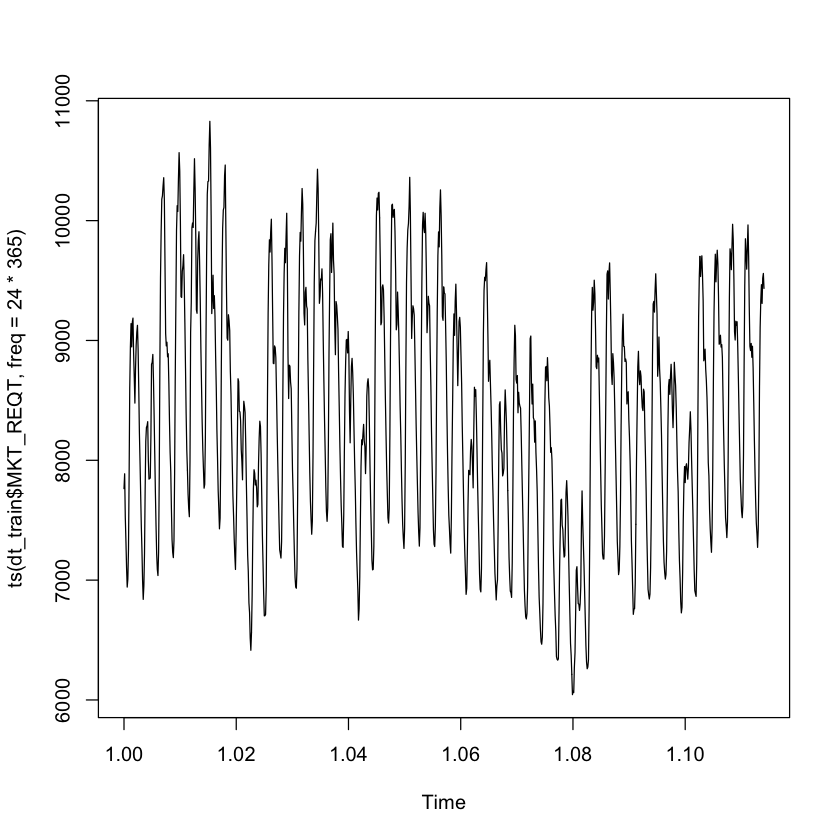

In [45]:
plot(ts(dt_train$MKT_REQT, freq = 24*365))

In [47]:
data_ts <- ts(dt_train$MKT_REQT, freq = 24*7)

decomp_ts <- stl(data_ts, s.window = "periodic", robust = TRUE)$time.series
 

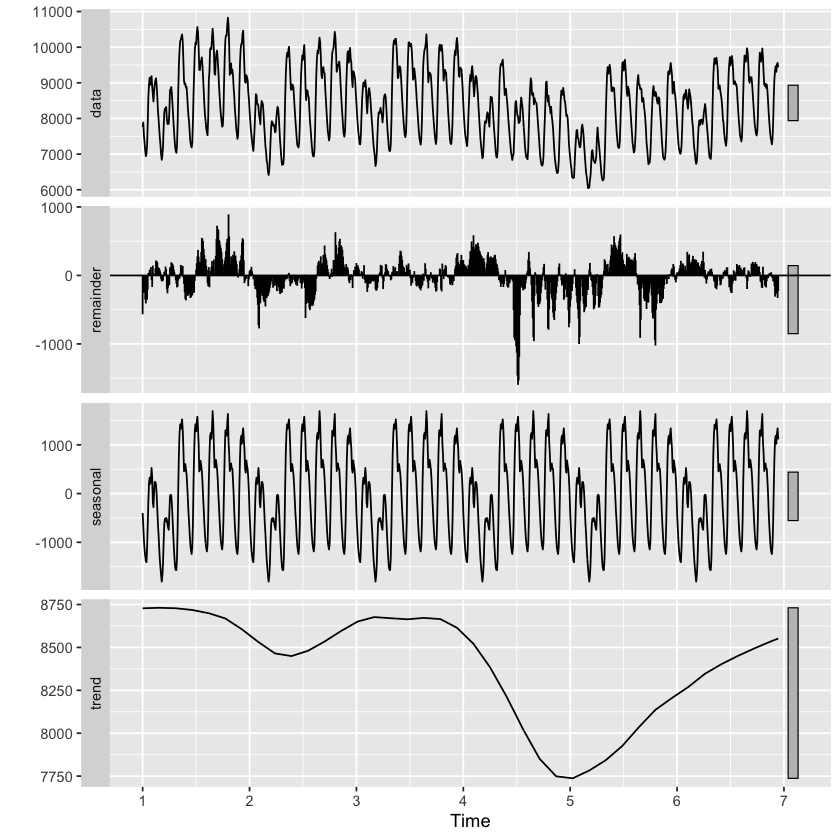

In [50]:
autoplot(stl(data_ts, s.window = "periodic", robust = TRUE))

### Exponential Models

In [54]:
fit = HoltWinters(data_ts, beta=FALSE, gamma=FALSE)


In [53]:
accuracy(fit)


ERROR: Error in accuracy.default(fit): First argument should be a forecast object or a time series.


In [55]:
fit

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = data_ts, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.9999262
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 9434.748

         Point Forecast    Lo 80     Hi 80    Lo 95    Hi 95
6.952381       9434.748 9045.771  9823.726 8839.859 10029.64
6.958333       9434.748 8884.672  9984.825 8593.479 10276.02
6.964286       9434.748 8761.053 10108.444 8404.420 10465.08

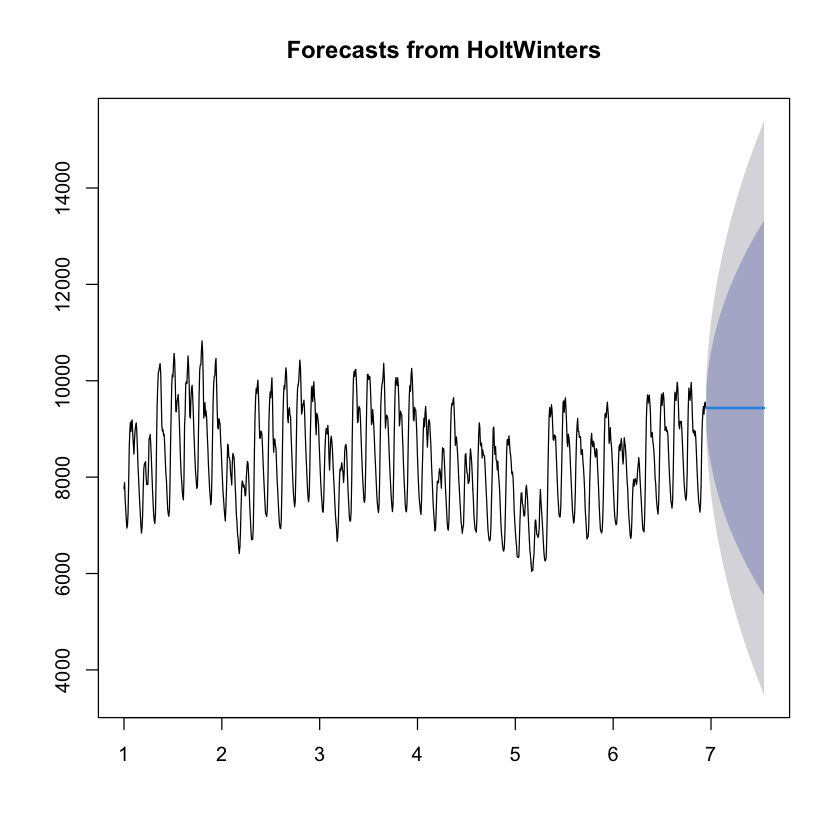

In [59]:
forecast(fit, 3)
plot(forecast(fit, 100))


### Arima

In [68]:
fit = arima(data_ts, order=c(p, d, q))

#accuracy(fit)

forecast(fit, 5)
plot(forecast(fit, 5))

ERROR: Error in arima(data_ts, order = c(p, d, q)): object 'p' not found


Warning message in ets(data_ts):
“I can't handle data with frequency greater than 24. Seasonality will be ignored. Try stlf() if you need seasonal forecasts.”


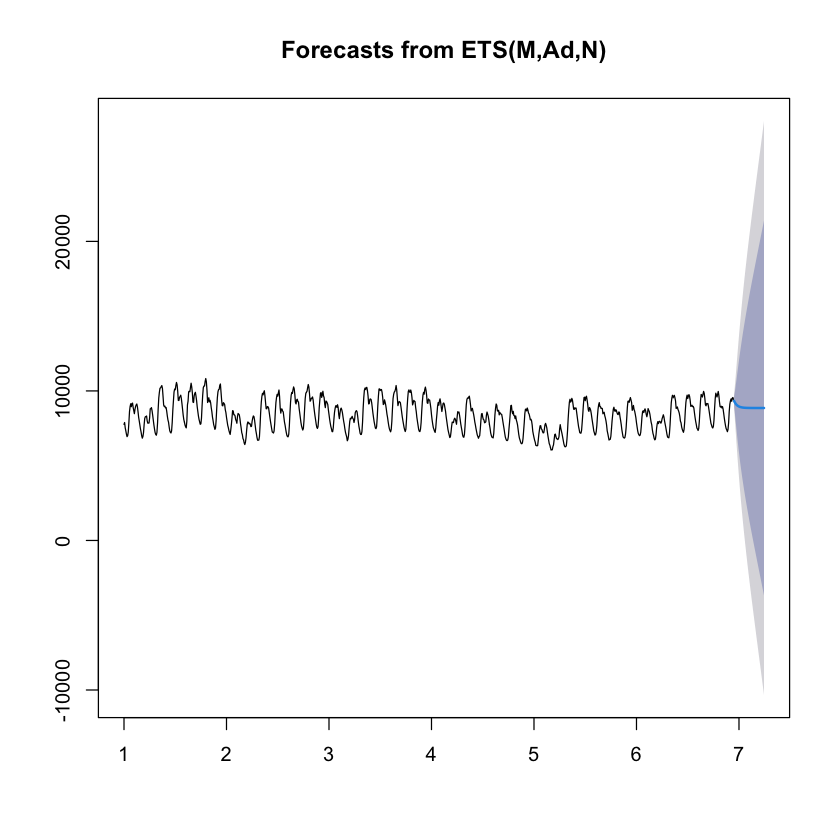

In [70]:
fit <- ets(data_ts)


plot(forecast(fit, 50))

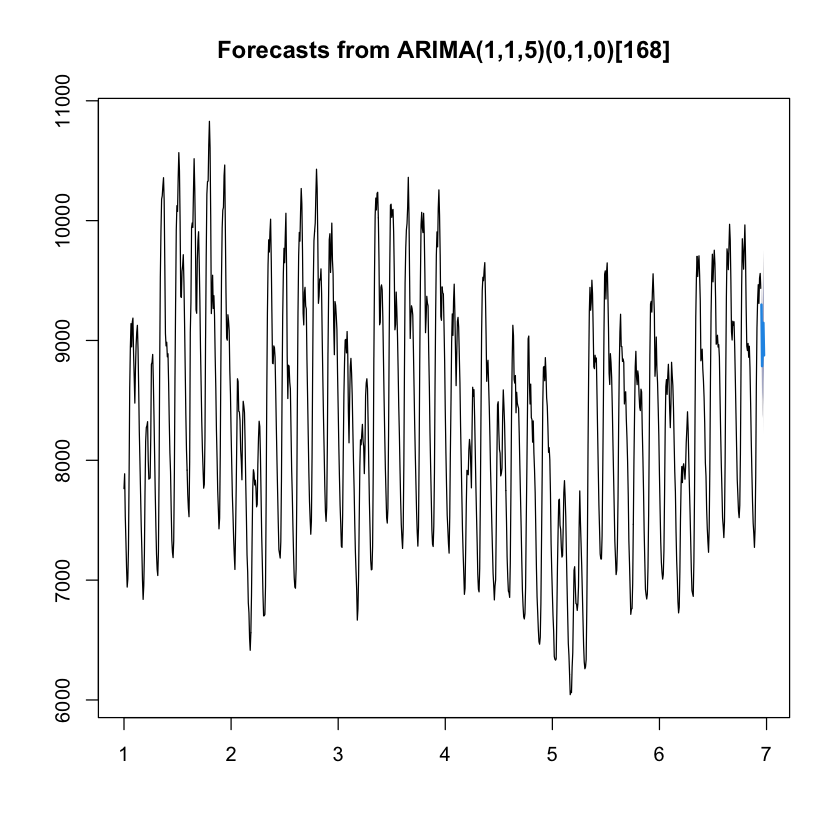

In [71]:
# Automated forecasting using an ARIMA model
fit <- auto.arima(data_ts)
plot(forecast(fit, 5))


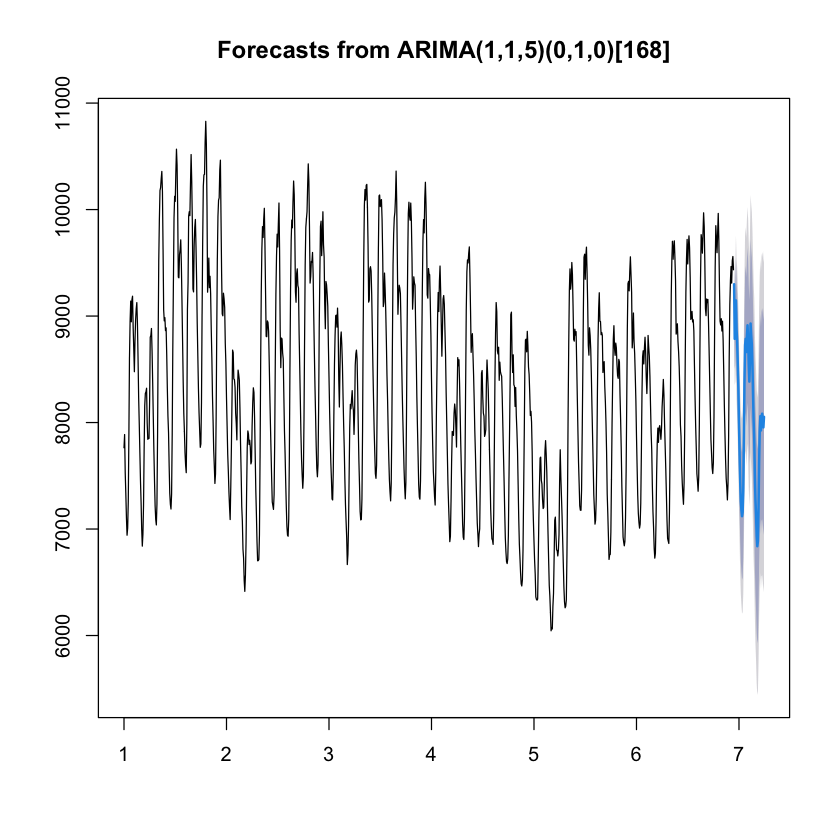

In [72]:
plot(forecast(fit, 50))